<a href="https://colab.research.google.com/github/FlavioSarto/FlavioSarto/blob/main/Trilha_2_Tarefa_(COLETA_E_ARMAZENAMENTO_DE_DADOS)_Flavio_Sarto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Nome: Flávio Sarto




In [110]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2021)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020
Extraindo ano 2021


In [112]:
df[df.index.duplicated()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,SF,23,TOT,63,0,847,66,141,.468,4,15,.267,62,126,.492,.482,35,53,.660,72,144,216,28,23,26,30,122,171,2014
1,1,Quincy Acy,SF,23,TOR,7,0,61,6,14,.429,2,5,.400,4,9,.444,.500,5,8,.625,5,10,15,4,4,3,2,8,19,2014
2,1,Quincy Acy,SF,23,SAC,56,0,786,60,127,.472,2,10,.200,58,117,.496,.480,30,45,.667,67,134,201,24,19,23,28,114,152,2014
3,2,Steven Adams,C,20,OKC,81,20,1197,93,185,.503,0,0,NaN,93,185,.503,.503,79,136,.581,142,190,332,43,40,57,71,203,265,2014
4,3,Jeff Adrien,PF,27,TOT,53,12,961,143,275,.520,0,0,NaN,143,275,.520,.520,76,119,.639,102,204,306,38,24,36,39,108,362,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,8,696,104,225,.462,33,83,.398,71,142,.500,.536,30,36,.833,28,77,105,97,43,11,35,30,271,2021
727,537,Thaddeus Young,PF,32,CHI,68,23,1652,370,662,.559,12,45,.267,358,617,.580,.568,71,113,.628,168,255,423,291,74,40,137,152,823,2021
728,538,Trae Young,PG,22,ATL,63,63,2125,487,1112,.438,136,397,.343,351,715,.491,.499,484,546,.886,38,207,245,594,53,12,261,111,1594,2021
729,539,Cody Zeller,C,28,CHO,48,21,1005,181,324,.559,4,28,.143,177,296,.598,.565,85,119,.714,119,209,328,86,27,17,51,121,451,2021


In [113]:
df = df[~df.index.duplicated()]

In [114]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [115]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


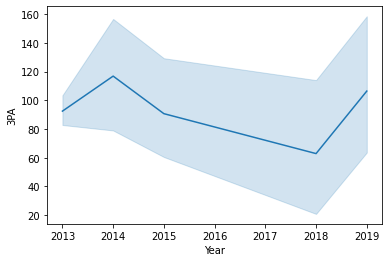

In [116]:
sns.lineplot(x='Year', y='3PA', data=df)

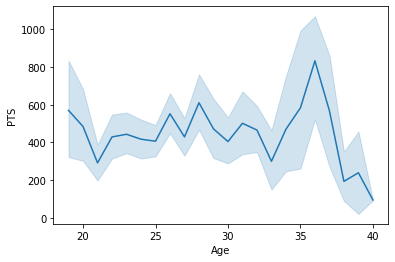

In [117]:
sns.lineplot(x='Age', y='PTS', data=df)

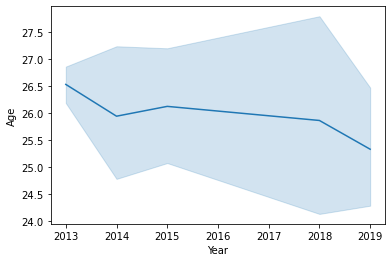

In [118]:
sns.lineplot(x='Year', y='Age', data=df)

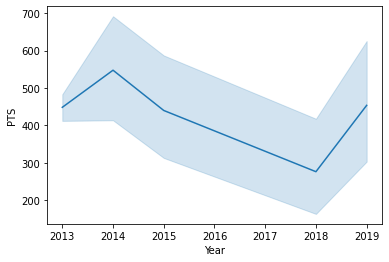

In [119]:
sns.lineplot(x='Year', y='PTS', data=df)